## Part 2

4. **Data Augmentation**
    1. Concatenate Augmentation
      - Data lack problem 및 imbalance 해결을 위해 같은 class data를 concate 해서 새로운 data 생성

  
5. **Pad and Split**
    1. Padding
        - Zero Padding
        - Duplicate Padding
        - Smart Padding
        - 다양한 패딩을 구현, 적절하게 사용하기
    2. Train Test Split


6. **Wav Data Augmentation**
    1. Wavform data 증강
        - Shift
        - Speed

7. **Feature Extraction & blank region clipping**
    1. Sound data 특징 추출 및 이미지화 : Mel - spectrogram
    2. 특징이 거의 없는 부분을 지워주는 blank region clippin 적용



8. **Image Data Augmentation**
    1. Masking
      - Time Masking
      - Frequency Masking


##4. Data Augmentation
concatnate augmentation을 통해 data imbalance를 해결합니다

In [ ]:
normal = raw_df2.loc[raw_df2['crack_wheeze'] == 0]
print ('정상인 호흡음의 갯수 : ', len(normal))

crackle = raw_df2.loc[raw_df2['crack_wheeze'] == 1]
print ('Crackle의 갯수 : ',len(crackle))

wheezing =  raw_df2.loc[raw_df2['crack_wheeze'] == 2]
print ('Wheezing의 갯수 : ',len(wheezing))

both = raw_df2.loc[raw_df2['crack_wheeze'] == 3]
print ('Crackle 및 wheezing 둘다 있는 경우의 갯수 : ',len(both))

정상인 호흡음의 갯수 :  3642
Crackle의 갯수 :  1864
Wheezing의 갯수 :  886
Crackle 및 wheezing 둘다 있는 경우의 갯수 :  506


In [ ]:
#Class 별 data를 리스트에 저장합니다
normal_audio_np = []
crackle_audio_np = []
wheezing_audio_np = []
both_audio_np = []

for idx, row in normal.iterrows():
  normal_audio,_ = librosa.load(root + 'processed_audio_files_no_pad/' + row.filename, sr = sr)
  normal_audio_np.append(normal_audio)

for idx, row in crackle.iterrows():
  crackle_audio,_ = librosa.load(root + 'processed_audio_files_no_pad/' + row.filename, sr = sr)
  crackle_audio_np.append(crackle_audio)

for idx, row in wheezing.iterrows():
  wheezing_audio,_ = librosa.load(root + 'processed_audio_files_no_pad/' + row.filename, sr = sr)
  wheezing_audio_np.append(wheezing_audio)

for idx, row in both.iterrows():
  both_audio,_ = librosa.load(root + 'processed_audio_files_no_pad/' + row.filename, sr = sr)
  both_audio_np.append(both_audio)

In [ ]:
def getPureSample(raw_data,end = 7*16000):
  if len(raw_data) > end:
    return raw_data[:end]
  else:
    return raw_data

In [ ]:
#augment crackle (1422개의 wave파일을 추가 생성합니다)
import random

scale = 1

crackle_nos = scale * len(normal_audio_np) - len(crackle_audio_np)

for idx in range(crackle_nos):
  aug_prob = random.random()

  if aug_prob < 0.6:
    #crakle_i + crackle_j
    i = random.randint(0,len(crackle_audio_np)-1)
    j = random.randint(0,len(crackle_audio_np)-1)
    sample_i = crackle_audio_np[i]
    sample_j = crackle_audio_np[j]

  elif aug_prob >= 0.6 and aug_prob < 0.8:
    # crakle_i + nomrmal_j
    i = random.randint(0,len(crackle_audio_np)-1)
    j = random.randint(0,len(normal_audio_np)-1)
    sample_i = crackle_audio_np[i]
    sample_j = normal_audio_np[j]

  else :
    # normal_i + crakcle_j
    i = random.randint(0,len(normal_audio_np)-1)
    j = random.randint(0,len(crackle_audio_np)-1)
    sample_i = normal_audio_np[i]
    sample_j = crackle_audio_np[j]

  new_sample = np.concatenate([sample_i, sample_j])

  filename= 'aug_crackle' + '_' + str(idx) + '.wav'

  sf.write(file = root + 'aug_crackle/' + filename , data=new_sample, samplerate = sr)

In [ ]:
#augment wheezing (2204개의 wave파일을 추가 생성합니다)

scale = 1

wheezing_nos = scale * len(normal_audio_np) - len(wheezing_audio_np)

for idx in range(wheezing_nos):
  aug_prob = random.random()

  if aug_prob < 0.6:
    # wheeze_i + wheeze_j
    i = random.randint(0,len(wheezing_audio_np)-1)
    j = random.randint(0,len(wheezing_audio_np)-1)
    sample_i = wheezing_audio_np[i]
    sample_j = wheezing_audio_np[j]

  elif aug_prob >= 0.6 and aug_prob < 0.8:
     # wheeze_i + normal_j
    i = random.randint(0,len(wheezing_audio_np)-1)
    j = random.randint(0,len(normal_audio_np)-1)
    sample_i = wheezing_audio_np[i]
    sample_j = normal_audio_np[j]

  else :
    # normal_i + wheeze_j
    i = random.randint(0,len(normal_audio_np)-1)
    j = random.randint(0,len(wheezing_audio_np)-1)
    sample_i = normal_audio_np[i]
    sample_j = wheezing_audio_np[j]

  new_sample = np.concatenate([sample_i, sample_j])

  filename= 'aug_wheezing' + '_' + str(idx) + '.wav'

  sf.write(file = root + 'aug_wheezing/' + filename , data=new_sample, samplerate = sr)

In [ ]:
#augment both (2508개의 wave파일을 추가 생성합니다)

scale = 1

both_nos = scale * len(normal_audio_np) - len(both_audio_np)

for idx in range(both_nos):
  aug_prob = random.random()

  if aug_prob < 0.5:
    # both_i + both_j
    i = random.randint(0,len(both_audio_np)-1)
    j = random.randint(0,len(both_audio_np)-1)
    sample_i = both_audio_np[i]
    sample_j = both_audio_np[j]

  elif aug_prob >= 0.5 and aug_prob < 0.7:
     # crackle_i + wheeze_j
    i = random.randint(0,len(crackle_audio_np)-1)
    j = random.randint(0,len(wheezing_audio_np)-1)
    sample_i = crackle_audio_np[i]
    sample_j = wheezing_audio_np[j]

  elif aug_prob >= 0.7 and aug_prob < 0.8:
     # wheeze_i + crackle_j
    i = random.randint(0,len(wheezing_audio_np)-1)
    j = random.randint(0,len(crackle_audio_np)-1)
    sample_i = wheezing_audio_np[i]
    sample_j = crackle_audio_np[j]

  elif aug_prob >= 0.8 and aug_prob < 0.9:
    # both_i + normal_j
    i = random.randint(0,len(both_audio_np)-1)
    j = random.randint(0,len(normal_audio_np)-1)
    sample_i = both_audio_np[i]
    sample_j = normal_audio_np[j]

  else:
    # normal_i + both_j
    i = random.randint(0,len(normal_audio_np)-1)
    j = random.randint(0,len(both_audio_np)-1)
    sample_i = normal_audio_np[i]
    sample_j = both_audio_np[j]

  new_sample = np.concatenate([sample_i, sample_j])

  filename= 'aug_both' + '_' + str(idx) + '.wav'

  sf.write(file = root + 'aug_both/' + filename , data=new_sample, samplerate = sr)


증강한 data를 dataframe에 추가하기

In [ ]:
df = raw_df2.copy()

In [ ]:
aug_crackle_filenames = []
for idx, row in crackle.itterrows():
  aug_crackle_filenames.append(row.filename)

aug_wheezing_filenames = []
for idx, row in wheezing.itterrows():
  aug_wheezing_filenames.append(row.filename)

aug_both_filenames = []
for idx, row in both.itterrows():
  aug_both_filenames.append(row.filename)

In [ ]:
crackle_df = pd.DataFrame(index=range(len(df),len(df)+crackle_nos))
crackle_df['filename'] = aug_crackle_filenames
crackle_df['crack_wheeze'] = 1

df = pd.concat([df, crackle_df])

wheezing_df = pd.DataFrame(index=range(len(df),len(df)+wheezing_nos))
wheezing_df['filename'] = aug_wheezing_filenames
wheezing_df['crack_wheeze'] = 1

df = pd.concat([df, wheezing_df])

both_df = pd.DataFrame(index=range(len(df),len(df)+both_nos))
both_df['filename'] = aug_both_filenames
both_df['crack_wheeze'] = 1

df = pd.concat([df, both_df])

df.to_csv(root + "aug_added_df.csv", mode='w')

In [ ]:
df = pd.read_csv(root + 'aug_added_df.csv') # raw + concat = 13032

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,start,end,pid,mode,filename,disease,crack_wheeze
0,0,0.0,1.862,5.718,160.0,mc,160_1b3_Al_mc_AKGC417L_0.wav,COPD,2
1,1,1.0,5.718,9.725,160.0,mc,160_1b3_Al_mc_AKGC417L_1.wav,COPD,3
2,2,2.0,9.725,13.614,160.0,mc,160_1b3_Al_mc_AKGC417L_2.wav,COPD,2
3,3,3.0,13.614,17.671,160.0,mc,160_1b3_Al_mc_AKGC417L_3.wav,COPD,2
4,4,4.0,17.671,19.541,160.0,mc,160_1b3_Al_mc_AKGC417L_4.wav,COPD,0
...,...,...,...,...,...,...,...,...,...
13027,13027,NaN,NaN,NaN,NaN,NaN,aug_both_503.wav,NaN,3
13028,13028,NaN,NaN,NaN,NaN,NaN,aug_both_504.wav,NaN,3
13029,13029,NaN,NaN,NaN,NaN,NaN,aug_both_505.wav,NaN,3
13030,13030,NaN,NaN,NaN,NaN,NaN,aug_both_506.wav,NaN,3


6898개에서 13032개로 증강했습니다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

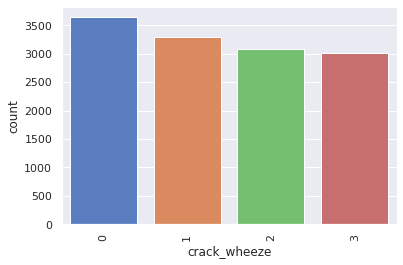

In [ ]:
sns.countplot(df.crack_wheeze)
plt.xticks(rotation=90)

##5. Pad and Split

모든 데이터에 duplicate padding을 적용하고 wav로 저장합니다.

In [ ]:
def check_length(audio, list_df, maxLen, save_path):
    if len(audio)/16000 > maxLen:
      audio = audio_slicing(audio)
      sf.write(file = save_path, data = audio, samplerate= sr)
      list_df.append(audio)
    else:
        new = np.concatenate((audio, audio))
        return check_length(new, list_df, maxLen, save_path)

In [ ]:
def audio_slicing(signal, max = 7 * sr):
  if len(signal) > max:
    return signal[:max]
  else:
    return signal

In [ ]:
df_pad = []
maxLen = 7

In [ ]:
#duplicated padding_train
for index, row in df.iterrows():

  filename = row['filename']  
  audio_file = root + 'raw_concat_no_pad/'+ filename
  audio_data, _ = lb.load(audio_file, sr=16000)
  duplicated = np.concatenate((audio_data, audio_data))
  check_data = len(duplicated) / 16000
  save_path = root + 'raw_concat_pad_7sec_2/' + filename

  if check_data > maxLen:
    duplicated = audio_slicing(duplicated)
    sf.write(file = save_path, data = duplicated, samplerate= sr)
    df_pad.append(duplicated)
    
  else:
    check_length(duplicated, df_pad, maxLen=maxLen, save_path=save_path)
  
  if index % 100 == 0:
    print(index)

raw data에서만 test data를 뽑기 위해 raw_df2에서 train test split을 해주고

전체 df에서 test data를 뺀 것을 train data로 사용합니다.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(raw_df2,
                                                    raw_df2.crack_wheeze,
                                                    stratify=raw_df2['crack_wheeze'],
                                                    random_state=42,
                                                    test_size=0.4)

In [ ]:
test_df = x_test

In [ ]:
train_df = df.drop(x_test.index) # 전체 df에서 test data 빼기
y_train = train_df.crack_wheeze

In [ ]:
len(train_df), len(y_train)

(10272, 10272)

In [ ]:
len(test_df), len(y_test)

(2760, 2760)

##6. Wav Data Augmentation
wav 파일에 대해 shift, speed augmentation을 적용합니다

In [ ]:
import nlpaug.augmenter.audio as naa
from random import uniform

def audio_shift(signal):
  luck = np.random.randint(0,2) # 50% 확률 만들기
  if luck == 0:
    aug = naa.ShiftAug(sampling_rate=sr, duration=uniform(1.5,3.5)) #0과 1 사이의 실수
    return aug.augment(signal)
  else:
    return signal

In [ ]:
def audio_speed(signal):
  luck = np.random.randint(0,2)
  if luck == 0:
    aug = naa.SpeedAug(zone=(0.2, 0.8), coverage=0.5, factor=(0.5, 1), stateless=True) #0과 1 사이의 실수
    return aug.augment(signal)
  else:
    return signal 

In [ ]:
def audio_slicing(signal, max = 7 * sr):
  if len(signal) > max:
    return signal[:max]
  else:
    return signal

In [ ]:
def pre_aug(signal,sr=sr):
  audio = audio_shift(signal)
  audio = audio_speed(audio)
  audio = audio_slicing(audio)
  return audio

3개의 sample로 augmentation이 잘 작동하는지 확인합니다

In [ ]:
aug_test = []
for idx in range(3):
  audio_2, _= lb.load(root + 'raw_concat_pad_7sec_2/' + wav_filename[idx], sr = sr)
  audio_aug = pre_aug(audio_2)
  aug_test.append(audio_aug)

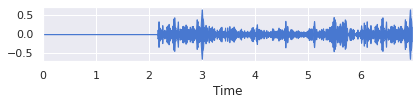

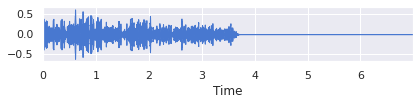

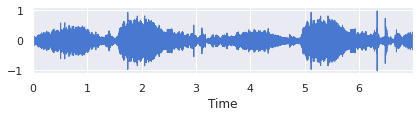

In [ ]:
plt.figure()

for idx in range(len(aug_test)):
  plt.subplot(3,1,idx+1)
  lbd.waveplot(aug_test[idx], sr=sr)
  plt.tight_layout()
  plt.show()

##7. Feature Extraction & blank region clipping

wavform을 이미지화하는 Mel-spectrogram함수입니다

In [ ]:
n_mels=128
f_min=100
f_max=16000
nfft=2048
hop= nfft//4

In [ ]:
def create_mel_raw(signal, sr=16000, n_mels=128, f_min=100, f_max=16000, nfft=2048, hop=512, resz=1):
    S = lb.feature.melspectrogram(y=signal, sr=sr, n_mels=n_mels, fmin=f_min, fmax=f_max, n_fft=nfft, hop_length=nfft//4)
    S = lb.power_to_db(S, ref=np.max) # 다음엔 median으로
    S = (S - np.min(S)) / (np.max(S) - np.min(S)) 
    S *= 255
    img = cv2.applyColorMap(S.astype(np.uint8), cmapy.cmap('magma'))
    height, width, _ = img.shape
    if resz > 0:
        img = cv2.resize(img, (width*resz, height*resz), interpolation=cv2.INTER_LINEAR) #bicubic interpolation
    img = cv2.flip(img, 0)
    return img

blank region clipping - feature가 적은 부분 잘라내는 기법입니다

In [ ]:
blank_clipping = []

for idx in range(3):
  audio_image = cv2.cvtColor(create_mel_raw(aug_test[idx]), cv2.COLOR_BGR2RGB)

  audio_raw_gray = cv2.cvtColor(create_mel_raw(aug_test[idx]), cv2.COLOR_BGR2GRAY)
  audio_raw_gray[audio_raw_gray < 10] = 0
  for row in range(audio_raw_gray.shape[0]):
    black_percent = len(np.where(audio_raw_gray[row,:]==np.min(audio_raw_gray))[0])/len(audio_raw_gray[row,:])
    if black_percent < 0.80:
      break

  if (row+1)*3 < audio_image.shape[0]:
    audio_image = audio_image[(row+1)*3:, :, :]

  audio_image = cv2.resize(audio_image, (audio_image.shape[1], n_mels*3), interpolation=cv2.INTER_LINEAR)
  audio_image, _, __ = cv2.split(audio_image)
  audio_image = cv2.resize(audio_image, (219,128), interpolation=cv2.INTER_LINEAR)
  audio_image = np.array(audio_image, dtype=float)
  audio_image = (audio_image - np.min(audio_image)) / (np.max(audio_image) - np.min(audio_image))

  blank_clipping.append(audio_image)


/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


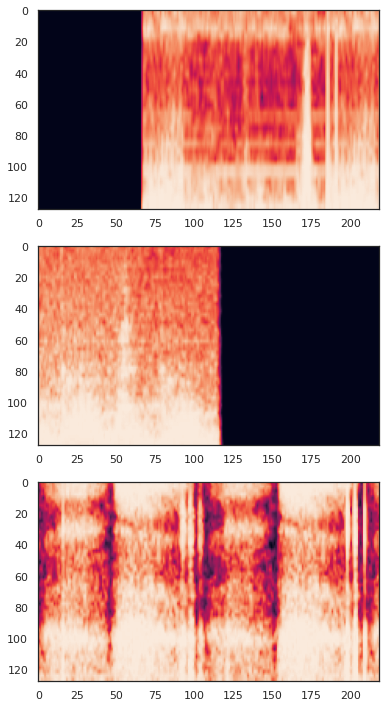

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(10,10))
for idx in range(3):
    plt.subplot(3, 1, idx+1)
    plt.tight_layout()
    plt.imshow(blank_clipping[idx])

##8. Image Data Augmentation
이미지 데이터에 대해 masking을 적용합니다

In [ ]:
def time_mask(mel, param = 30):
  return tfio.audio.time_mask(mel, param = param)

def freq_mask(mel):
  return tfio.audio.freq_mask(mel, param = 30)

def process_mask(mel):
  prob = np.random.randint(0,3)
  if prob == 0:
    return time_mask(mel)
  elif prob == 1:
    return freq_mask(mel)
  else:
    return time_mask(mel, param = 1)

구현한 preprocess와 augmentation 함수를 하나의 for문에 넣고 돌립니다.

In [ ]:
train_list = [] # duplicate 패딩 된 데이터
c = 0
for idx, row in train_df.iterrows():
  #데이터 load
  sample_wav, _ = lb.load(root + 'raw_concat_pad_7sec_2/' + row.filename, sr = sr)
  
  #shift, speed augmentation
  aug = pre_aug(sample_wav) 

  #creat Mel-spectrogram and apply blank region clipping
  audio_image = cv2.cvtColor(create_mel_raw(aug), cv2.COLOR_BGR2RGB)

  audio_raw_gray = cv2.cvtColor(create_mel_raw(aug), cv2.COLOR_BGR2GRAY)
  audio_raw_gray[audio_raw_gray < 10] = 0
  for row in range(audio_raw_gray.shape[0]):
    black_percent = len(np.where(audio_raw_gray[row,:]==np.min(audio_raw_gray))[0])/len(audio_raw_gray[row,:])
    if black_percent < 0.80:
      break

  if (row+1)*3 < audio_image.shape[0]:
    audio_image = audio_image[(row+1)*3:, :, :]

  audio_image = cv2.resize(audio_image, (audio_image.shape[1], n_mels*3), interpolation=cv2.INTER_LINEAR)
  audio_image, _, __ = cv2.split(audio_image)
  audio_image = cv2.resize(audio_image, (219,128), interpolation=cv2.INTER_LINEAR)
  audio_image = np.array(audio_image, dtype=float)
  audio_image = (audio_image - np.min(audio_image)) / (np.max(audio_image) - np.min(audio_image))

  #masking augmentation
  mask = process_mask(audio_image)
  
  train_list.append(mask)
  c += 1

  if c % 100 == 0:
    print(c)

넘파이 배열로 저장합니다

In [ ]:
x_train_1 = np.array(train_list)
np.save(root + 'ref_max_13032.npy', x_train_1)

In [ ]:
x_train_1 = np.load(root + 'ref_max_13032.npy')

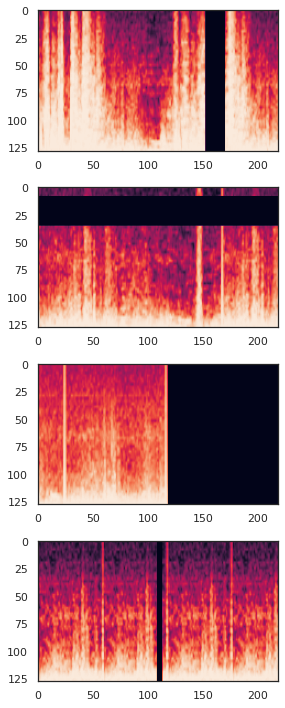

In [ ]:
plt.figure(figsize = (10,10))

for idx in range(4):
  plt.subplot(4,1,idx+1)
  plt.tight_layout()
  plt.imshow(x_train_1[idx])

마스킹도 잘 작용된 것을 확인할 수 있습니다

테스트 데이터에 Mel-spectrogram과 blank region clipping을  적용합니다(augmentation을 제외)

In [ ]:
test_list = [] # duplicate 패딩 된 데이터
c = 0
for idx, row in test_df.iterrows():
  sample_wav, _ = lb.load(root + 'raw_concat_pad_7sec_2/' + row.filename, sr = sr)

  audio_image = cv2.cvtColor(create_mel_raw(sample_wav), cv2.COLOR_BGR2RGB)

  audio_raw_gray = cv2.cvtColor(create_mel_raw(sample_wav), cv2.COLOR_BGR2GRAY)
  audio_raw_gray[audio_raw_gray < 10] = 0
  for row in range(audio_raw_gray.shape[0]):
    black_percent = len(np.where(audio_raw_gray[row,:]==np.min(audio_raw_gray))[0])/len(audio_raw_gray[row,:])
    if black_percent < 0.80:
      break

  if (row+1)*3 < audio_image.shape[0]:
    audio_image = audio_image[(row+1)*3:, :, :]

  audio_image = cv2.resize(audio_image, (audio_image.shape[1], n_mels*3), interpolation=cv2.INTER_LINEAR)
  audio_image, _, __ = cv2.split(audio_image)
  audio_image = cv2.resize(audio_image, (219,128), interpolation=cv2.INTER_LINEAR)
  audio_image = np.array(audio_image, dtype=float)
  audio_image = (audio_image - np.min(audio_image)) / (np.max(audio_image) - np.min(audio_image))
  
  test_list.append(audio_image)
  c += 1

  if c % 100 == 0:
    print(c)

In [ ]:
x_test_1 = np.array(test_list)
np.save(root + 'ref_max_13032_test.npy', x_test_1)

In [ ]:
x_test_1 = np.load(root + 'ref_max_13032_test.npy')

In [ ]:
y_train_1 = np.array(y_train)
y_test_1 = np.array(y_test)